# Programming assignment #3
Course: CHE1147H - Data Mining in Engineering
Topic: Feature engineering
Name: Kecheng Xiao
ID:1008709140

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Import the data and create the anchor date columns

In [2]:
# 1 Import the dataset as txn
txn = pd.read_csv('Retail_Data_Transactions.csv')
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
# Identify the number of rows
txn.shape[0]

125000

In [4]:
# 2 Create a new column 'txn date' from 'trans date' with pd.to datetime
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
txn.head()

,customer_id,trans_date,tran_amount,txn_date
0,CS5295,11-Feb-13,35,2013-02-11
1,CS4768,15-Mar-15,39,2015-03-15
2,CS2122,26-Feb-13,52,2013-02-26
3,CS1217,16-Nov-11,99,2011-11-16
4,CS1850,20-Nov-13,78,2013-11-20


In [5]:
# Drop the column 'trans date'
txn.drop('trans_date', axis=1, inplace=True)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


In [6]:
# 3 Identify the min() and max() of column 'txn date'
min(txn['txn_date'])

Timestamp('2011-05-16 00:00:00')

In [7]:
max(txn['txn_date'])

Timestamp('2015-03-16 00:00:00')

In [8]:
# 4 Create the column 'ME DT': the last day of the month in the 'trans date' column
txn['ME_DT'] = txn['txn_date'] + pd.offsets.MonthEnd(n=1)
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


In [9]:
# 5 Create the column 'YEAR': the year in the 'trans date' column
txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year
txn.iloc[55:60,:]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-09-30,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


## 1.2 Create features that capture annual spending

In [10]:
# 1 Using groupby and NamedAgg create clnt annual aggregations
agg_sum = pd.NamedAgg(column='tran_amount', aggfunc='sum')
agg_ave = pd.NamedAgg(column='tran_amount', aggfunc='mean')
agg_std = pd.NamedAgg(column='tran_amount', aggfunc='std')
agg_var = pd.NamedAgg(column='tran_amount', aggfunc='var')
agg_sem = pd.NamedAgg(column='tran_amount', aggfunc='sem')
agg_max = pd.NamedAgg(column='tran_amount', aggfunc='max')
agg_min = pd.NamedAgg(column='tran_amount', aggfunc='min')
agg_cnt = pd.NamedAgg(column='tran_amount', aggfunc='count')

clnt_annual_aggregations = txn.groupby(['customer_id', 'YEAR']).agg(
    ann_txn_amt_sum = agg_sum,
    ann_txn_amt_ave = agg_ave,
    ann_txn_amt_std = agg_std,
    ann_txn_amt_var = agg_var,
    ann_txn_amt_sem = agg_sem,
    ann_txn_amt_max = agg_max,
    ann_txn_amt_min = agg_min,
    ann_txn_amt_cnt = agg_cnt
)
clnt_annual_aggregations = pd.DataFrame(clnt_annual_aggregations)
clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1

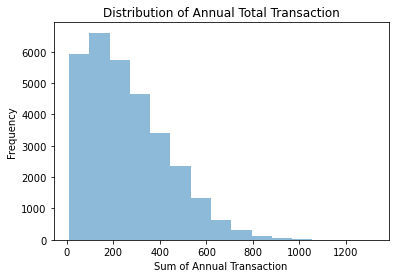

In [11]:
# 2 Plot the histogram of the sum and count
clnt_annual_aggregations['ann_txn_amt_sum'].plot.hist(bins=15, alpha=0.5)
plt.xlabel('Sum of Annual Transaction')
plt.title('Distribution of Annual Total Transaction')
plt.show()

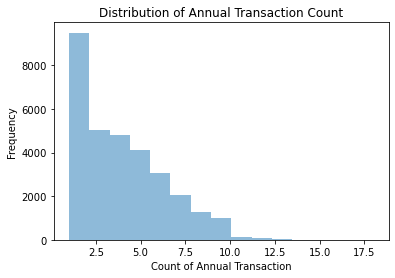

In [12]:
clnt_annual_aggregations['ann_txn_amt_cnt'].plot.hist(bins=15, alpha=0.5)
plt.xlabel('Count of Annual Transaction')
plt.title('Distribution of Annual Transaction Count')
plt.show()

In [13]:
# 3 Reset the index and reshape the table
clnt_annual_aggregations_pivot = pd.pivot_table(clnt_annual_aggregations,
                                                index=['customer_id'],
                                                columns=['YEAR']
)

In [14]:
txn.isna().values.any()

False

In [15]:
# See NaN data
clnt_annual_aggregations_pivot[clnt_annual_aggregations_pivot.isna().any(axis=1)]

ann_txn_amt_ave                                         \
YEAR                   2011       2012       2013       2014  2015   
customer_id                                                          
CS1112            70.666667  67.400000  70.666667  70.666667  39.0   
CS1114            85.200000  75.000000  70.400000  70.833333  79.0   
CS1115            87.000000  67.571429  79.571429  78.250000  55.0   
CS1116            58.750000  76.666667  59.000000  66.600000   NaN   
CS1117            71.000000  65.333333  69.400000  71.500000   NaN   
...                     ...        ...        ...        ...   ...   
CS8996            31.000000  33.666667  41.500000  56.000000   NaN   
CS8997            45.000000  39.500000  35.166667  42.000000   NaN   
CS8998            64.000000  54.400000  47.000000  32.500000   NaN   
CS8999            52.000000  25.250000  28.000000  21.000000   NaN   
CS9000            19.500000  54.000000  73.500000  24.250000  34.0   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  NaN  ...           235.0  230.0   
CS1117                  3.0  3.0  5.0  6.0  NaN  ...           213.0  196.0   
...                     ...  ...  ...  ...  ...  ...             ...    ...   
CS8996                  2.0  3.0  2.0  6.0  NaN  ...            62.0  101.0   
CS8997                  2.0  4.0  6.0  2.0  NaN  ...            90.0  158.0   
CS8998                  2.0  5.0  2.0  4.0  NaN  ...           128.0  272.0   
CS8999                  3.0  4.0  3.0  2.0  NaN  ...           156.0  101.0   
CS9000                  2.0  4.0  2.0  4.0  1.0  ...            39.0  216.0   

                                ann_txn_amt_var                            \
YEAR          2013   2014  2015            2011         2012         2013   
customer_id                                                                 
CS1112       212.0  212.0  39.0      485.333333   161.800000  1190.333333   
CS1114       352.0  425.0  79.0       94.700000   968.000000   619.300000   
CS1115       557.0  313.0  55.0      225.000000   477.285714   110.952381   
CS1116        59.0  333.0   NaN      449.583333   908.333333          NaN   
CS1117       347.0  429.0   NaN      679.000000  1070.333333   302.300000   
...            ...    ...   ...             ...          ...          ...   
CS8996        83.0  336.0   NaN       98.000000    20.333333   144.500000   
CS8997       211.0   84.0   NaN        8.000000    45.666667   441.366667   
CS8998        94.0  130.0   NaN       50.000000   505.300000  1568.000000   
CS8999        84.0   42.0   NaN      333.000000    21.583333   103.000000   
CS9000       147.0   97.0  34.0       24.500000   281.333333    12.500000   

                              
YEAR               2014 2015  
customer_id                   
CS1112       284.333333  NaN  
CS1114       726.166667  NaN  
CS1115       512.250000  NaN  
CS1116       636.800000  NaN  
CS1117       251.900000  NaN  
...                 ...  ...  
CS8996       481.600000  NaN  
CS8997        18.000000  NaN  
CS8998       219.666667  NaN  
CS8999        18.000000  NaN  
CS9000        68.250000  NaN  

[5682 rows x 40 columns]

In [16]:
# Impute NaN
clnt_annual_aggregations_pivot.fillna(0, inplace=True)
clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  

[5 rows x 40 columns]

#### Answer 1.2.3
Impute the NaN entries when you perform the pivot table function and explain your choice of values.
**A: Since we have total 8 different metrics and 4 years (from 2011 to 2015), if we multi-indexing on the column direction, it will 40 (8\*5) columns. For NaN, I fill those with 0, because the absence of data are caused by either not able to compute those metrics or simply no transaction data in those period, which all means 0.**

In [17]:
# 4 Observation of multi-indexing data
clnt_annual_aggregations_pivot.columns.nlevels

2

In [18]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

#### Answer 1.2.4
What are your observations regarding the number of levels and the column names?
**A: There are two level of columns, the first level are those metrics and the second are the years, so the column names are pairs with every metric and every year.**

In [19]:
# 5 Change column level
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000


#### Answer 1.2.5
Describe what each line of code in the box does?
**A: The first and second lines get the level of columns from original pivot table and modify the integer(years) to string format, the third line is to set the column names for the pivot table dataframe with the combination of two levels(joined by `_`).**

In [20]:
# Save to .xlsx
clnt_annual_aggregations_pivot.to_excel('annual_features.xlsx')

#### Answer 1.2.6
What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?
**A: From bank side, the annual transaction statistics for behavior analysis could be inaccurate and lack seasoning pattern due to the time scope is too wide. From client side, if they want to know their transaction behavior, the last year's transaction statistics will not be very helpful due to lacking timeliness.**

## 1.3 Create monthly aggregations

In [21]:
# 1 Using groupby and NamedAgg create clnt annual aggregations

clnt_monthly_aggregations = txn.groupby(['customer_id', 'ME_DT']).agg(
    mth_txn_amt_sum = agg_sum,
    mth_txn_amt_cnt = agg_cnt
)
clnt_monthly_aggregations = pd.DataFrame(clnt_monthly_aggregations)
clnt_monthly_aggregations.head()

mth_txn_amt_sum  mth_txn_amt_cnt
customer_id ME_DT                                       
CS1112      2011-06-30               56                1
            2011-08-31               96                1
            2011-10-31               60                1
            2012-04-30               56                1
            2012-06-30               52                1

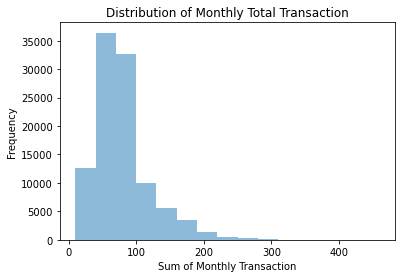

In [22]:
# 2 Create a histogram of both columns you created
clnt_monthly_aggregations['mth_txn_amt_sum'].plot.hist(bins=15, alpha=0.5)
plt.xlabel('Sum of Monthly Transaction')
plt.title('Distribution of Monthly Total Transaction')
plt.show()

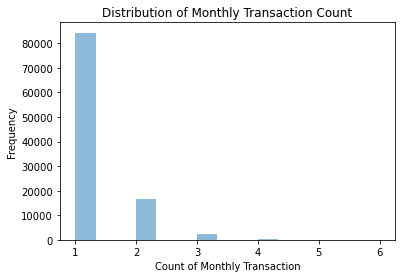

In [23]:
clnt_monthly_aggregations['mth_txn_amt_cnt'].plot.hist(bins=15, alpha=0.5)
plt.xlabel('Count of Monthly Transaction')
plt.title('Distribution of Monthly Transaction Count')
plt.show()

#### Answer 1.3.2
What are your observations? What are the most common and maximum values for each column? How do they compare with the ones in section 1.2?
**A: The pattern in monthly is similar to the annual transaction's, only few of transactions are over 200 dollar and most of the transactions are under 100. Regarding the monthly transaction frequency, most of the clients(near 80%) have only one transaction per monthly. Therefore, combining both plots, we will see the data is very unbalanced or irregular. For the count, the most common value is definitely 1, which means 1 transaction per month.**

## 1.4 Create the base table for the rolling window features

In [47]:
# 1 Create the numpy array of the unique elements in columns 'customer id' and 'ME DT'

clnt_no = np.array(txn['customer_id'].unique())
clnt_no.shape

(6889,)

In [48]:
me_dt = np.array(txn['ME_DT'].unique())
me_dt.shape

(47,)

In [49]:
# 2 Use itertools.product to generate all the possible combinations of 'customer id' and 'ME DT'
from itertools import product
base_table = product(clnt_no , me_dt)
base_table

In [50]:
# 3 Convert the itertools.product object base table into a pandas object
base_table_pd = pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])
base_table_pd.head()

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31


In [51]:
# 4 Validate that you created the table
base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].min()

Timestamp('2011-05-31 00:00:00')

In [52]:
base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].max()

Timestamp('2015-03-31 00:00:00')

In [53]:
txn[txn['customer_id']=='CS1112']['txn_date'].min() # is smaller than the CS1112 (in range)

Timestamp('2011-06-15 00:00:00')

In [54]:
txn[txn['customer_id']=='CS1112']['txn_date'].max() # is greater than the CS1112 (in range)

Timestamp('2015-01-14 00:00:00')

In [55]:
# Month value check
base_table_pd[base_table_pd['CLNT_NO']=='CS1112'].sort_values(by='ME_DT')

,CLNT_NO,ME_DT
157064,CS1112,2011-05-31
157059,CS1112,2011-06-30
157044,CS1112,2011-07-31
157070,CS1112,2011-08-31
157061,CS1112,2011-09-30
157048,CS1112,2011-10-31
157029,CS1112,2011-11-30
157049,CS1112,2011-12-31
157046,CS1112,2012-01-31
157032,CS1112,2012-02-29


In [56]:
# Dimension check
base_table_pd.shape

(323783, 2)

In [57]:
base_table_pd['CLNT_NO'].unique().shape

(6889,)

In [58]:
base_table_pd['ME_DT'].unique().shape

(47,)

## 1.5 Create the monthly rolling window features

In [59]:
# 1 Left-join the base table pd with the clnt monthly aggregations table
clnt_monthly_aggregations.index.set_names(['CLNT_NO', 'ME_DT'], inplace=True)
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, how='left', on=['CLNT_NO', 'ME_DT'])
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS8077,2013-09-30,NaN,NaN
323779,CS8077,2011-08-31,30.0,1.0
323780,CS8077,2012-09-30,NaN,NaN
323781,CS8077,2014-02-28,NaN,NaN


#### Answer 1.5.1
- Why do some rows have NaN values?
    **A: Because clients have no transaction during those months causing NaN.**
- What values will you choose to impute NaN values in the sum and count columns? Perform the imputation you suggest.
    **A: Since the issue is caused by no transaction, the NaN just means 0 sum and 0 count(so use 0 to fill).**
- Confirm that the number of rows is what you expect. What is the value?
    **A: The number of rows is 323783, that is the exact row number of `base_table_pd`, which is expected.**
- How are tables base clnt mth and clnt monthly aggregations diﬀerent? Comment on the number of rows and the content of each table.
    **A: The `base_clnt_mth` is a more complete collection of client data by recording all the months, rather than a data collection with months having transactions(non-zero), which is `clnt_monthly_aggregation`.**

In [60]:
# 2 Sort the data first by 'CLNT NO' and then by 'ME DT' in ascending order
base_clnt_mth.fillna(0, inplace=True)
base_clnt_mth.sort_values(by=['CLNT_NO', 'ME_DT'], inplace=True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
157064,CS1112,2011-05-31,0.0,0.0
157059,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157070,CS1112,2011-08-31,96.0,1.0
157061,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295141,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,0.0,0.0


In [61]:
# 3 Calculate separately the 3-month rolling window features
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum', 'mth_txn_amt_cnt']].rolling(3).agg(['sum','mean','max'])
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_amt_cnt               
                           sum       mean   max             sum      mean  max
CLNT_NO                                                                       
CS1112  157064             NaN        NaN   NaN             NaN       NaN  NaN
        157059             NaN        NaN   NaN             NaN       NaN  NaN
        157044            56.0  18.666667  56.0             1.0  0.333333  1.0
        157070           152.0  50.666667  96.0             2.0  0.666667  1.0
        157061            96.0  32.000000  96.0             1.0  0.333333  1.0

In [62]:
rolling_features_3M.index.nlevels

2

In [63]:
rolling_features_3M.columns.nlevels

2

#### Answer 1.5.3
- How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?
    **A: There will be 2, 5, 11(n-1) NaN row at the beginning respectively, because the calculation is to get statistics from previous n months, which causes at the beginning the window will not be able to fit-in depending on its size.**
- How many levels do the index and columns have? Are these MultiIndex dataframes?
    **A: The levels of index and column are both 2, which means these are multi-indexed dataframes. For index direction, it keeps the original row index and combines with the `CLNT_NO`; similarly, for column direction, it keeps the original column names and combines with the metrics.**

In [64]:
# Rename the columns
rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_3M

amt_sum_3M  amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  \
CLNT_NO                                                               
CS1112  157064         NaN          NaN         NaN             NaN   
        157059         NaN          NaN         NaN             NaN   
        157044        56.0    18.666667        56.0             1.0   
        157070       152.0    50.666667        96.0             2.0   
        157061        96.0    32.000000        96.0             1.0   
...                    ...          ...         ...             ...   
CS9000  295141         0.0     0.000000         0.0             0.0   
        295126         0.0     0.000000         0.0             0.0   
        295119         0.0     0.000000         0.0             0.0   
        295136         0.0     0.000000         0.0             0.0   
        295114        34.0    11.333333        34.0             1.0   

                txn_cnt_mean_3M  txn_cnt_max_3M  
CLNT_NO                                          
CS1112  157064              NaN             NaN  
        157059              NaN             NaN  
        157044         0.333333             1.0  
        157070         0.666667             1.0  
        157061         0.333333             1.0  
...                         ...             ...  
CS9000  295141         0.000000             0.0  
        295126         0.000000             0.0  
        295119         0.000000             0.0  
        295136         0.000000             0.0  
        295114         0.333333             1.0  

[323783 rows x 6 columns]

In [65]:
# Calculate separately the 6 -month rolling window features
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum', 'mth_txn_amt_cnt']].rolling(6).agg(['sum','mean','max'])
rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_6M.head(10)

amt_sum_6M  amt_mean_6M  amt_max_6M  txn_cnt_sum_6M  \
CLNT_NO                                                               
CS1112  157064         NaN          NaN         NaN             NaN   
        157059         NaN          NaN         NaN             NaN   
        157044         NaN          NaN         NaN             NaN   
        157070         NaN          NaN         NaN             NaN   
        157061         NaN          NaN         NaN             NaN   
        157048       212.0    35.333333        96.0             3.0   
        157029       212.0    35.333333        96.0             3.0   
        157049       156.0    26.000000        96.0             2.0   
        157046       156.0    26.000000        96.0             2.0   
        157032        60.0    10.000000        60.0             1.0   

                txn_cnt_mean_6M  txn_cnt_max_6M  
CLNT_NO                                          
CS1112  157064              NaN             NaN  
        157059              NaN             NaN  
        157044              NaN             NaN  
        157070              NaN             NaN  
        157061              NaN             NaN  
        157048         0.500000             1.0  
        157029         0.500000             1.0  
        157049         0.333333             1.0  
        157046         0.333333             1.0  
        157032         0.166667             1.0

In [66]:
# Calculate separately the 12-month rolling window features
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum', 'mth_txn_amt_cnt']].rolling(12).agg(['sum','mean','max'])
rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']
rolling_features_12M.head(15)

amt_sum_12M  amt_mean_12M  amt_max_12M  txn_cnt_sum_12M  \
CLNT_NO                                                                   
CS1112  157064          NaN           NaN          NaN              NaN   
        157059          NaN           NaN          NaN              NaN   
        157044          NaN           NaN          NaN              NaN   
        157070          NaN           NaN          NaN              NaN   
        157061          NaN           NaN          NaN              NaN   
        157048          NaN           NaN          NaN              NaN   
        157029          NaN           NaN          NaN              NaN   
        157049          NaN           NaN          NaN              NaN   
        157046          NaN           NaN          NaN              NaN   
        157032          NaN           NaN          NaN              NaN   
        157045          NaN           NaN          NaN              NaN   
        157051        268.0     22.333333         96.0              4.0   
        157062        268.0     22.333333         96.0              4.0   
        157073        264.0     22.000000         96.0              4.0   
        157065        345.0     28.750000         96.0              5.0   

                txn_cnt_mean_12M  txn_cnt_max_12M  
CLNT_NO                                            
CS1112  157064               NaN              NaN  
        157059               NaN              NaN  
        157044               NaN              NaN  
        157070               NaN              NaN  
        157061               NaN              NaN  
        157048               NaN              NaN  
        157029               NaN              NaN  
        157049               NaN              NaN  
        157046               NaN              NaN  
        157032               NaN              NaN  
        157045               NaN              NaN  
        157051          0.333333              1.0  
        157062          0.333333              1.0  
        157073          0.333333              1.0  
        157065          0.416667              1.0

In [67]:
# Drop the index level 0
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)

In [68]:
# 4 Merge the 4 tables
all_rolling_features = pd.concat([base_clnt_mth, rolling_features_3M, rolling_features_6M, rolling_features_12M], axis=1)
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157059,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157070,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157061,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295141,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295126,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295119,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
295136,CS9000,2015-02-28,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,81.0,6.750000,35.0,3.0,0.250000,1.0


In [69]:
# 5 Check output
all_rolling_features.shape

(323783, 22)

In [70]:
# Save to .xlsx
all_rolling_features.to_excel('mth_rolling_features.xlsx')

## 1.6 Date-related features: days since last transaction

In [71]:
# 1 Use the attributes' dt.dayofweek and/or dt.day name() to extract the day of the week
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


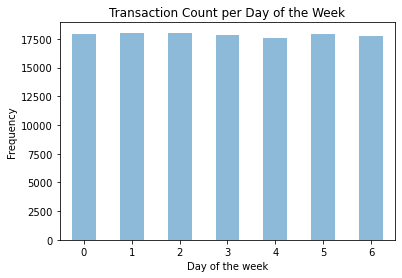

In [72]:
# 2 Create the bar plot that shows the count of transactions per day of the week
txn['day_of_the_week'].value_counts().sort_index().plot(kind='bar', alpha=0.5)
plt.xticks(rotation=0)
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Transaction Count per Day of the Week')
plt.show()

In [73]:
# 3 Generate the features that capture the count of transactions per client
clnt_weekly_aggregations = txn.groupby(['customer_id', 'YEAR', 'day_name'])['tran_amount'].agg(cnt='count')
clnt_weekly_aggregations = pd.DataFrame(clnt_weekly_aggregations)
clnt_weekly_aggregations.head()

cnt
customer_id YEAR day_name      
CS1112      2011 Friday       1
                 Sunday       1
                 Wednesday    1
            2012 Saturday     1
                 Sunday       3

In [74]:
# Create multi-indexed table
clnt_weekly_aggregations_pivot = pd.pivot_table(clnt_weekly_aggregations, index = 'customer_id', columns = ('YEAR', 'day_name')).fillna(0)
clnt_weekly_aggregations_pivot = clnt_weekly_aggregations_pivot.astype(int)
clnt_weekly_aggregations_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [75]:
# Create compound-indexed table
clnt_weekly_aggregations_pivot.columns = ['_'.join([str(i) for i in c]) for c in clnt_weekly_aggregations_pivot.columns]
clnt_weekly_aggregations_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


In [76]:
# Check shape
clnt_weekly_aggregations_pivot.shape

(6889, 35)

In [77]:
clnt_annual_aggregations_pivot.shape

(6889, 40)

In [78]:
clnt_weekly_aggregations_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

#### Answer 1.6.4
Confirm that your output has the same number of rows as the final output in section 1.2. How many features/columns did you create in this section?
**A: The output does have the same number of row as the `clnt_annual_aggregations_pivot`, which is 6889, and we create 35 features in this section. We have 7 day a week and 5 years' scope(2011 to 2015), so in total, we have 5\*7=35 features.**

In [79]:
# 5 Generate the features that capture the count of transactions per client, month-end-date and day of the week
clnt_weekly_mth_aggregations = txn.groupby(['customer_id', 'ME_DT', 'day_name'])['tran_amount'].agg(cnt = 'count')
clnt_weekly_mth_aggregations_pivot = pd.pivot_table(clnt_weekly_mth_aggregations, index = ('customer_id', 'ME_DT'), columns = 'day_name').fillna(0).astype(int)
clnt_weekly_mth_aggregations_pivot.columns = ['_'.join([str(i) for i in c]) for c in clnt_weekly_mth_aggregations_pivot.columns]
clnt_weekly_mth_aggregations_pivot

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   
...                            ...         ...           ...         ...   
CS9000      2014-01-31           0           0             0           1   
            2014-05-31           0           0             0           0   
            2014-07-31           0           0             0           0   
            2014-08-31           0           0             0           1   
            2015-03-31           0           0             1           0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0  
...                              ...          ...            ...  
CS9000      2014-01-31             0            0              0  
            2014-05-31             1            0              0  
            2014-07-31             0            1              0  
            2014-08-31             0            0              0  
            2015-03-31             0            0              0  

[103270 rows x 7 columns]

In [80]:
# 6 Join with base table pd
clnt_weekly_mth_aggregations_pivot.index.set_names(['CLNT_NO', 'ME_DT'], inplace=True)
base_clnt_mth_wk = base_table_pd.merge(clnt_weekly_mth_aggregations_pivot, how='left', on=['CLNT_NO', 'ME_DT'])
base_clnt_mth_wk = base_clnt_mth_wk.fillna(0).sort_values(by=['CLNT_NO','ME_DT']).astype(
    {li:'int' for li in clnt_weekly_mth_aggregations_pivot.columns})
base_clnt_mth_wk

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
157064,CS1112,2011-05-31,0,0,0,0,0,0,0
157059,CS1112,2011-06-30,0,0,0,0,0,0,1
157044,CS1112,2011-07-31,0,0,0,0,0,0,0
157070,CS1112,2011-08-31,1,0,0,0,0,0,0
157061,CS1112,2011-09-30,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
295141,CS9000,2014-11-30,0,0,0,0,0,0,0
295126,CS9000,2014-12-31,0,0,0,0,0,0,0
295119,CS9000,2015-01-31,0,0,0,0,0,0,0
295136,CS9000,2015-02-28,0,0,0,0,0,0,0


In [81]:
# Save to .xlsx
base_clnt_mth_wk.to_excel('mth_day_counts.xlsx')

## 1.7 Date-related features: days since last transaction

In [82]:
# 1 Create the table last monthly purchase that captures the last ’txn date’ for every client and month
last_monthly_purchase = pd.DataFrame(txn.groupby(['customer_id', 'ME_DT'])['txn_date'].max())
last_monthly_purchase.head()

txn_date
customer_id ME_DT                
CS1112      2011-06-30 2011-06-15
            2011-08-31 2011-08-19
            2011-10-31 2011-10-02
            2012-04-30 2012-04-08
            2012-06-30 2012-06-24

In [83]:
# 2 Join base table pd with last monthly purchase
last_monthly_purchase.index.set_names(['CLNT_NO', 'ME_DT'], inplace=True)
last_monthly_purchase_base = base_table_pd.merge(last_monthly_purchase, how='left', on=['CLNT_NO', 'ME_DT'])
last_monthly_purchase_base = last_monthly_purchase_base.sort_values(by=['CLNT_NO', 'ME_DT'])
last_monthly_purchase_base.head(8)

,CLNT_NO,ME_DT,txn_date
157064,CS1112,2011-05-31,NaT
157059,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157070,CS1112,2011-08-31,2011-08-19
157061,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT


In [84]:
# 3 Fill NaT
last_monthly_purchase_base = last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())
last_monthly_purchase_base.iloc[92:98,:]

,CLNT_NO,ME_DT,txn_date
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101129,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101140,CS1114,2011-08-31,2011-08-24


In [85]:
# 4 Subtract the two date columns and convert the output to .dt.days to calculate the column ’days since last txn’
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT']-last_monthly_purchase_base['txn_date']).dt.days
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,txn_date,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157059,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157070,CS1112,2011-08-31,2011-08-19,12.0
157061,CS1112,2011-09-30,2011-08-19,42.0


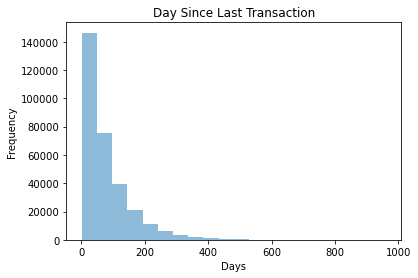

In [86]:
# 5 Plot a histogram of the ’days since last txn’
last_monthly_purchase_base['days_since_last_txn'].plot.hist(bins=20, alpha=0.5)
plt.title('Day Since Last Transaction')
plt.xlabel('Days')
plt.show()

In [91]:
# Check for possible value for NaN and no zero in the days since last txn
last_monthly_purchase_base[last_monthly_purchase_base['days_since_last_txn']==0.0]

,CLNT_NO,ME_DT,txn_date,days_since_last_txn


In [93]:
last_monthly_purchase_base[last_monthly_purchase_base['CLNT_NO']=='CS1140']

,CLNT_NO,ME_DT,txn_date,days_since_last_txn
25276,CS1140,2011-05-31,2011-05-21,10.0
25271,CS1140,2011-06-30,2011-06-06,24.0
25256,CS1140,2011-07-31,2011-06-06,55.0
25282,CS1140,2011-08-31,2011-08-25,6.0
25273,CS1140,2011-09-30,2011-08-25,36.0
25260,CS1140,2011-10-31,2011-08-25,67.0
25241,CS1140,2011-11-30,2011-08-25,97.0
25261,CS1140,2011-12-31,2011-08-25,128.0
25258,CS1140,2012-01-31,2012-01-03,28.0
25244,CS1140,2012-02-29,2012-01-31,29.0


In [98]:
last_monthly_purchase_base[last_monthly_purchase_base['days_since_last_txn']==0].shape

(0, 4)

**Comment: Although there is no zero in the data, we still need to use some negative value to impute the NaN. By doing so, we can easily see the amount of NaN caused by initial months before a client makes a purchase.**

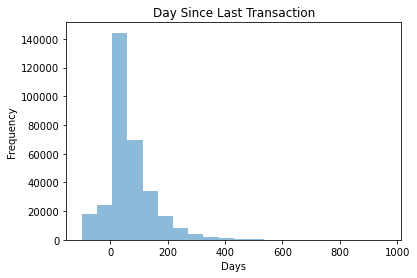

In [66]:
# Impute the remaining NaN values
last_monthly_purchase_base['days_since_last_txn'].fillna(-100, inplace=True)
last_monthly_purchase_base['days_since_last_txn'].plot.hist(bins=20, alpha=0.5)
plt.title('Day Since Last Transaction')
plt.xlabel('Days')
plt.show()

In [67]:
last_monthly_purchase_base.iloc[92:98,:]

,CLNT_NO,ME_DT,txn_date,days_since_last_txn
160011,CS1113,2015-02-28,2015-02-09,19.0
159989,CS1113,2015-03-31,2015-02-09,50.0
101134,CS1114,2011-05-31,NaT,-100.0
101129,CS1114,2011-06-30,NaT,-100.0
101114,CS1114,2011-07-31,2011-07-14,17.0
101140,CS1114,2011-08-31,2011-08-24,7.0


In [68]:
# Save to .xlsx
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel('days_since_last_txn.xlsx')